<a href="https://colab.research.google.com/github/dongjuray/Group-4/blob/main/Education_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import f_oneway, chi2_contingency
import scipy.stats as stats
import statsmodels.api as sm

# 데이터 전처리

In [ ]:
edu = pd.read_csv('/content/xAPI-Edu-Data.csv')

In [ ]:
perfor = pd.read_csv('/content/Student_performance_data _.csv')

In [ ]:
Grade = pd.read_csv('/content/Students_Grading_Dataset.csv')

In [ ]:
edu.isnull().sum()  # 각 열의 결측치 개수 확인

,0
gender,0
NationalITy,0
PlaceofBirth,0
StageID,0
GradeID,0
SectionID,0
Topic,0
Semester,0
Relation,0
raisedhands,0


In [ ]:
perfor.isnull().sum()  # 각 열의 결측치 개수 확인

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [ ]:
Grade.isnull().sum()

,0
Student_ID,0
First_Name,0
Last_Name,0
Email,0
Gender,0
Age,0
Department,0
Attendance (%),0
Participation_Score,0
Projects_Score,0


In [ ]:
# 이상치 제거
num_cols = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
for col in num_cols:
    Q1 = edu[col].quantile(0.25)
    Q3 = edu[col].quantile(0.75)
    IQR = Q3 - Q1

    edu = edu[~((edu[col] < (Q1 - 1.5 * IQR)) | (edu[col] > (Q3 + 1.5 * IQR)))]


In [ ]:
# StudentAbsenceDays를 0과 1의 수치형 데이터로 변환
edu['StudentAbsenceDays'] = edu['StudentAbsenceDays'].map({'Under-7': 0, 'Above-7': 1})

In [ ]:
# edu 데이터의 수치형 분류
edu_numeric = edu.select_dtypes(include=['number'])

In [ ]:
# education과 같이 Male = 1, Female = 0
perfor['Gender'] = perfor['Gender'].map({1 : 0, 0 : 1})

In [ ]:
# 성적 수치화
Grade['Grade_numeric'] = Grade['Grade'].map({'A' : 0, 'B' : 1, 'C' : 2, 'D' : 3, 'F' : 4})

In [ ]:
# 결측치 최빈값으로 대체
Grade["Parent_Education_Level"].fillna(Grade["Parent_Education_Level"].mode()[0], inplace=True)

<ipython-input-81-f188b8cd3863>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Grade["Parent_Education_Level"].fillna(Grade["Parent_Education_Level"].mode()[0], inplace=True)


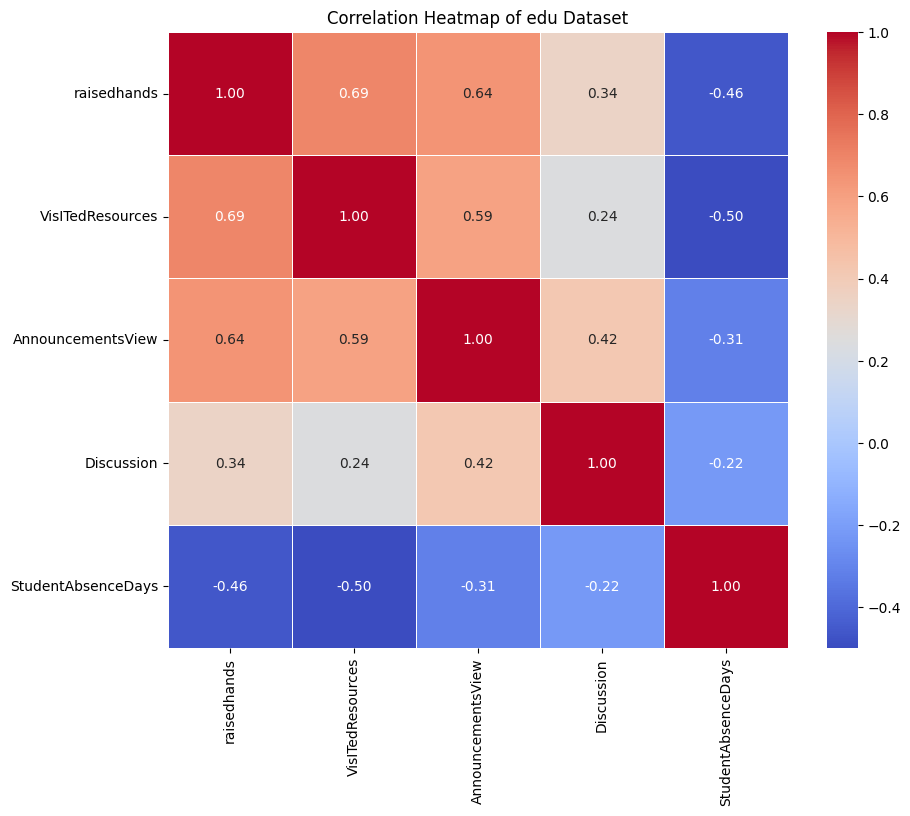

In [ ]:
# 수치형 데이터들간의 상관계수 확인
# 상관계수 계산
edu_correlation_matrix = edu_numeric.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(edu_correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# 라벨 추가
plt.title("Correlation Heatmap of edu Dataset")

# 그래프 출력
plt.show()


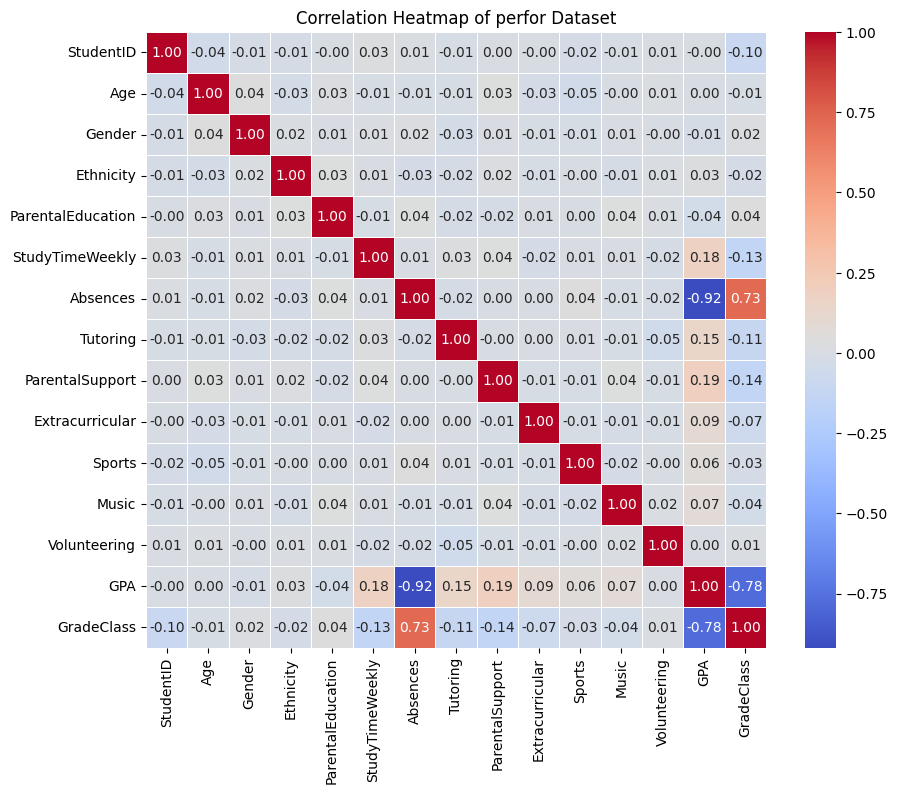

In [ ]:
# 상관계수 계산
perfor_correlation_matrix = perfor.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(perfor_correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# 라벨 추가
plt.title("Correlation Heatmap of perfor Dataset")

# 그래프 출력
plt.show()


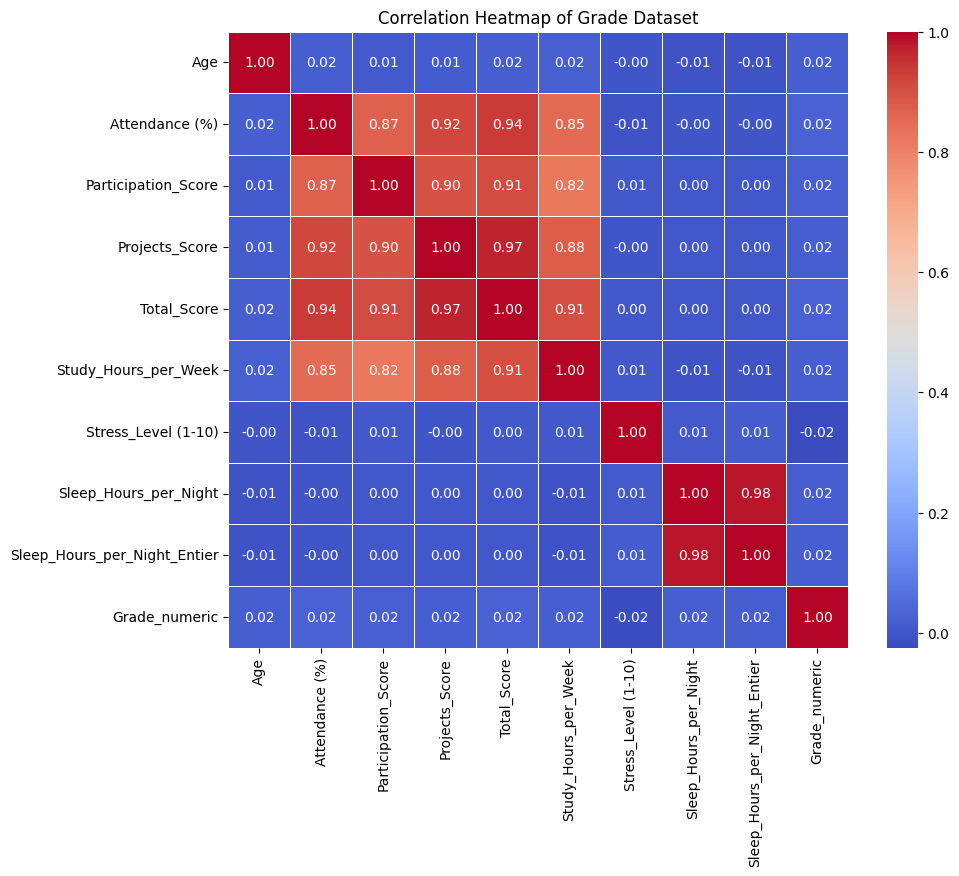

In [ ]:
# 상관계수 계산
Grade_correlation_matrix = Grade_numeric.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# 라벨 추가
plt.title("Correlation Heatmap of Grade Dataset")

# 그래프 출력
plt.show()

# 가설 1: 여성이 남성보다 성적이 높을 것이다

자료 1

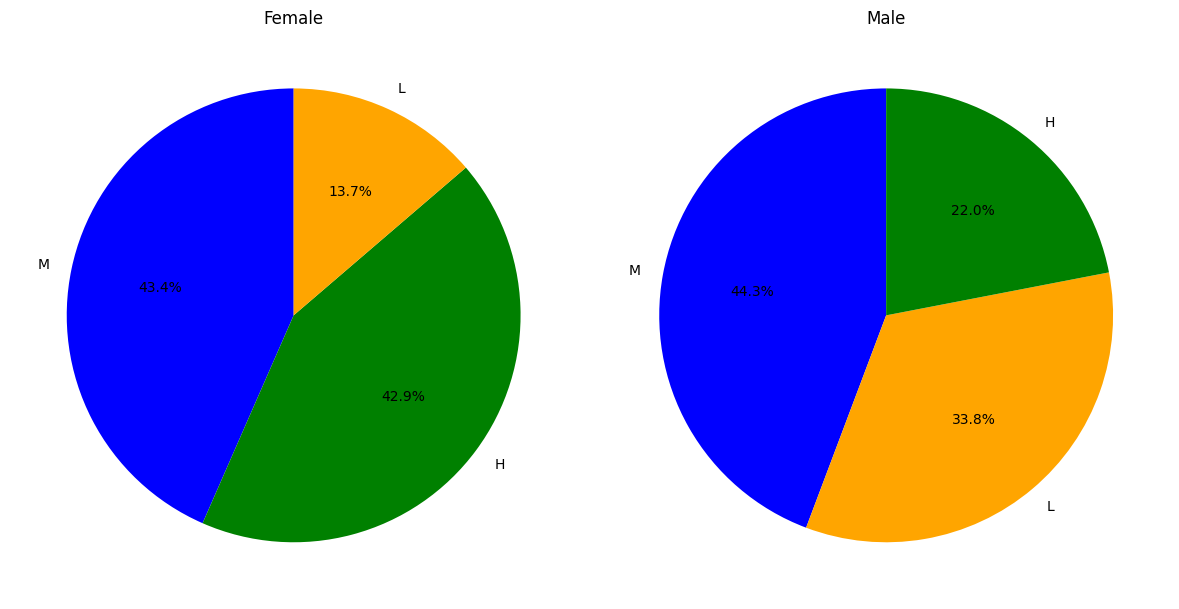

In [ ]:

#  Female 일 때의 Class 비율
Female = edu[edu["gender"] == 'F']["Class"].value_counts()
# Male 일 때의 Class 비율
Male = edu[edu["gender"] == 'M']["Class"].value_counts()


# 색상 고정 (L=orange, M=blue, H=green)
colors = {"L": "orange", "M": "blue", "H": "green"}

# 파이차트 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Female 파이차트
axes[0].pie(Female, labels=Female.index, autopct='%1.1f%%', startangle=90,
            colors=[colors[label] for label in Female.index])
axes[0].set_title("Female")

# Male 파이차트
axes[1].pie(Male, labels=Male.index, autopct='%1.1f%%', startangle=90,
            colors=[colors[label] for label in Male.index])
axes[1].set_title("Male")


plt.tight_layout()
plt.show()

<ipython-input-80-ca7a002bad95>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=edu["gender"], y=edu["Class_numeric"], palette=["red", "blue"])


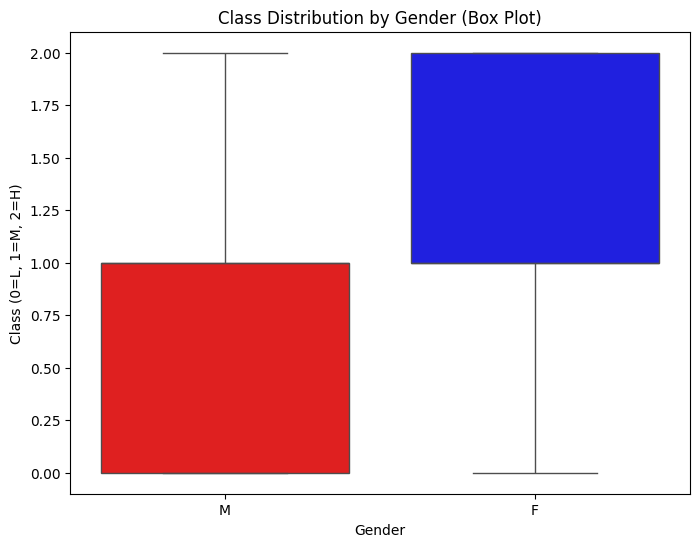

{'T통계량': 6.07, 'P-value': 0.0}


In [ ]:
# 여학생(F)의 Class 값만 추출
class_female = edu[edu["gender"] == "F"]["Class_numeric"]

# 남학생(M)의 Class 값만 추출
class_male = edu[edu["gender"] == "M"]["Class_numeric"]

t_stat, p_value = stats.ttest_ind(class_female, class_male, equal_var=False)

# 박스플롯 (Box Plot) 시각화
edu['Class_numeric'] = edu['Class'].map({'L':0, 'M':1, 'H':2})
plt.figure(figsize=(8, 6))
sns.boxplot(x=edu["gender"], y=edu["Class_numeric"], palette=["red", "blue"])
plt.xlabel("Gender")
plt.ylabel("Class (0=L, 1=M, 2=H)")
plt.title("Class Distribution by Gender (Box Plot)")
plt.show()

print({
    "T통계량": round(float(t_stat), 3),
    "P-value": round(float(p_value), 6)})



*   여성의 H class 비율이 남성의 H class 비율에 비해 압도적으로 높은 것을 확인 할 수 있다. 또한 박스플롯을 보아도 Class 평균이 여성이 높다는 것을 확인할 수 있다.
*   따라서 여성이 남성보다 성적이 높을 확률이 높다는 것을 확인
P-value = 0.0 < 0.05



<ipython-input-73-85b73eeda4f5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=perfor["Gender"], y=perfor["GPA"], palette=["red", "blue"])


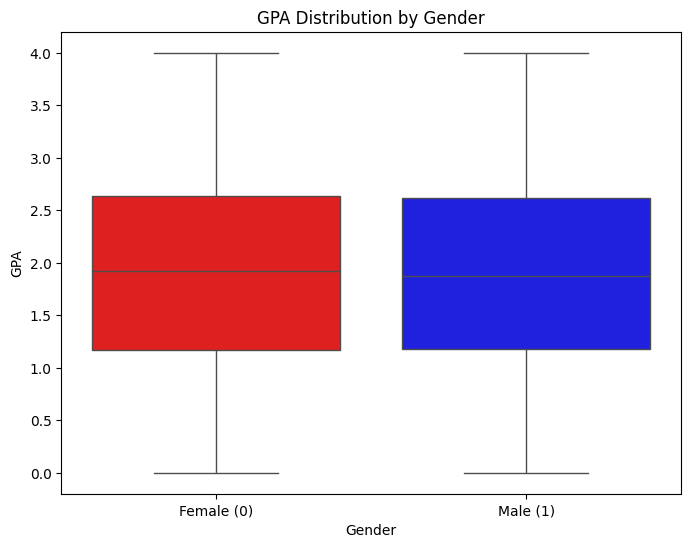

{'여성 GPA 평균': 1.9186788948802054, '남성 GPA 평균': 1.8942253102389894, 'T검정': 0.6532351689605722, 'P-value': 0.5136676190960221}


In [ ]:
#성별(Gender)과 성적(GPA) 차이 분석


# 남학생과 여학생의 GPA 평균 비교
gpa_female = perfor[perfor["Gender"] == 0]["GPA"]
gpa_male = perfor[perfor["Gender"] == 1]["GPA"]

# 성별별 GPA 평균
mean_female = gpa_female.mean()
mean_male = gpa_male.mean()

# t-test 수행 (성별에 따른 GPA 차이 검증)
t_stat, p_value = stats.ttest_ind(gpa_female, gpa_male, equal_var=False)

# 박스플롯 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x=perfor["Gender"], y=perfor["GPA"], palette=["red", "blue"])
plt.xticks(ticks=[0, 1], labels=["Female (0)", "Male (1)"])
plt.xlabel("Gender")
plt.ylabel("GPA")
plt.title("GPA Distribution by Gender")
plt.show()

# 결과 출력
print({
    "여성 GPA 평균": float(mean_female),
    "남성 GPA 평균": float(mean_male),
    "T검정": float(t_stat),
    "P-value": float(p_value)
})




*  여성의 성적 = 1.91, 남성의 성적 = 1.89로 여성의 성적이 더 높다.
*  그러나 p-value = 0.51 > 0.05이므로 유의미한 차이가 있다고 보기 어렵다-> 성별이 성적에 큰 영향을 끼치지 않는다


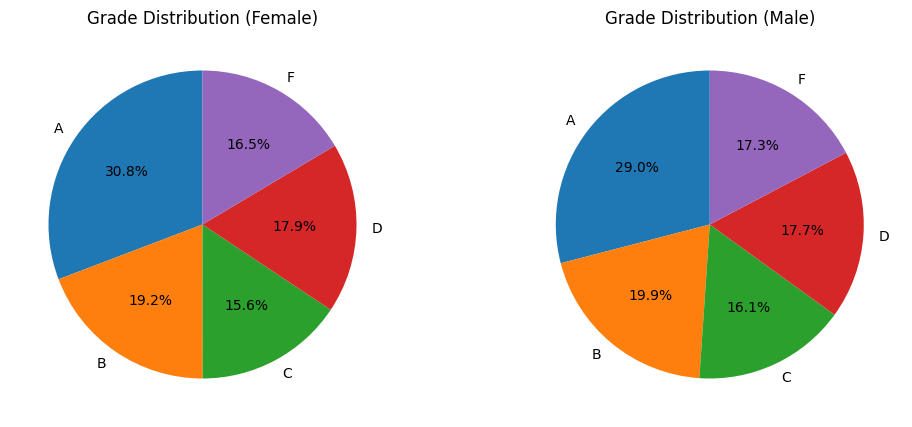

In [ ]:
# Female(0)과 Male(1) 각각의 Grade 분포 계산
female_grade_counts = Grade[Grade["Gender"] == 'Female']["Grade"].value_counts().sort_index()
male_grade_counts = Grade[Grade["Gender"] == 'Male']["Grade"].value_counts().sort_index()

# 라벨 정의 (A=0, B=1, C=2, D=3, F=4)
grade_labels = ["A", "B", "C", "D", "F"]

# Female Grade 분포 파이 차트
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie(female_grade_counts, labels=grade_labels, autopct='%1.1f%%', startangle=90)
plt.title("Grade Distribution (Female)")

# Male Grade 분포 파이 차트
plt.subplot(1, 2, 2)
plt.pie(male_grade_counts, labels=grade_labels, autopct='%1.1f%%', startangle=90)
plt.title("Grade Distribution (Male)")

# 그래프 출력
plt.show()



*   여성과 남성의 성적 비율이 큰 차이 없는 것을 확인할 수 있다.
*   따라서 여성이 남성보다 유의미하게 성적이 높지 않다는 것을 확인



# 가설 2: 아시아인의 공부시간이 다른 인종보다 높을 것이다.

<ipython-input-45-230db88027e5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ethnicity_studytime_mean.index, y=ethnicity_studytime_mean.values, palette="coolwarm")


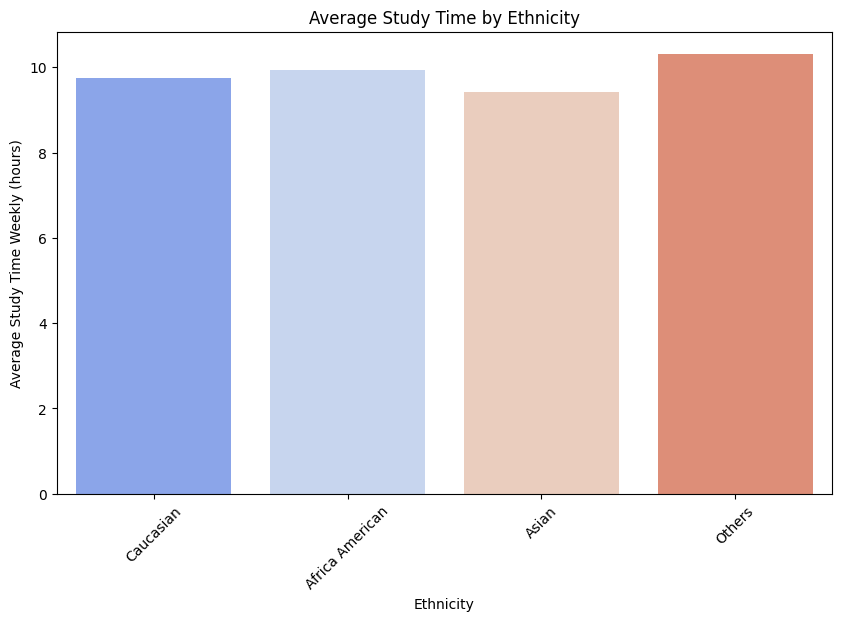

,Ethnicity,StudyTimeWeekly
Ethnicity,1.000000,0.007184
StudyTimeWeekly,0.007184,1.000000


In [ ]:
# 인종별 평균 학습 시간 (Bar Plot)
ethnicity_studytime_mean = perfor.groupby("Ethnicity")["StudyTimeWeekly"].mean().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=ethnicity_studytime_mean.index, y=ethnicity_studytime_mean.values, palette="coolwarm")

# 라벨 변경
plt.xlabel("Ethnicity")
plt.ylabel("Average Study Time Weekly (hours)")
plt.title("Average Study Time by Ethnicity")
plt.xticks(ticks=[0, 1, 2, 3], labels=[ethnicity_labels[e] for e in [0, 1, 2, 3]], rotation=45)

plt.show()



*   아시아인이 최저 학습시간인 것을 확인할 수 있다
*   따라서 아시아인의 학습시간이 다른 인종보다 높지 않다는 것을 확인



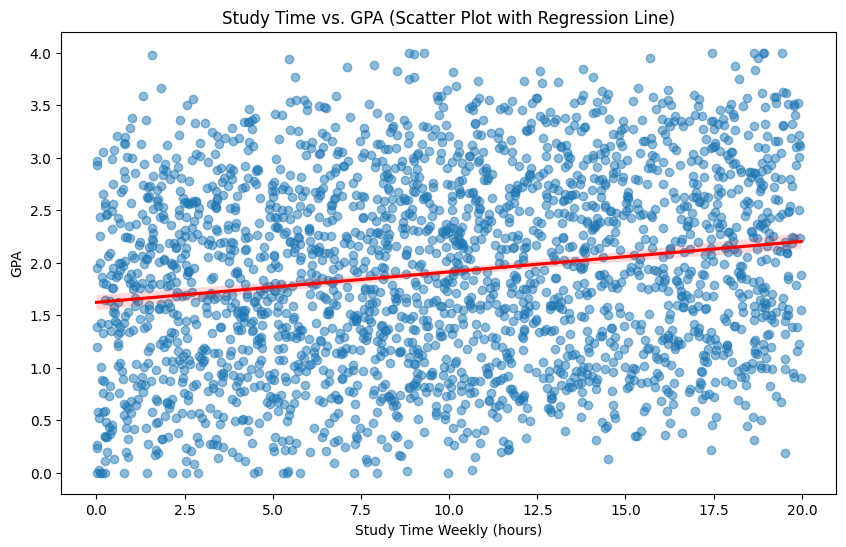

In [ ]:
#  학습 시간(StudyTimeWeekly)과 성적(GPA) 관계 - 산점도 + 회귀선 추가
plt.figure(figsize=(10, 6))
sns.regplot(x=perfor["StudyTimeWeekly"], y=perfor["GPA"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Study Time Weekly (hours)")
plt.ylabel("GPA")
plt.title("Study Time vs. GPA (Scatter Plot with Regression Line)")
plt.show()

# 가설 3: Study Time Wekkly(STW)와 GPA의 산점도와 회귀선을 보니 양의 상관관계를 가지는 것을 확인 했다. 따라서 STW가 가장 낮은 아시아인은 GPA가 가장 낮을 것이다.

<ipython-input-37-6c042b96593d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ethnicity_gpa_mean.index, y=ethnicity_gpa_mean.values, palette="coolwarm")


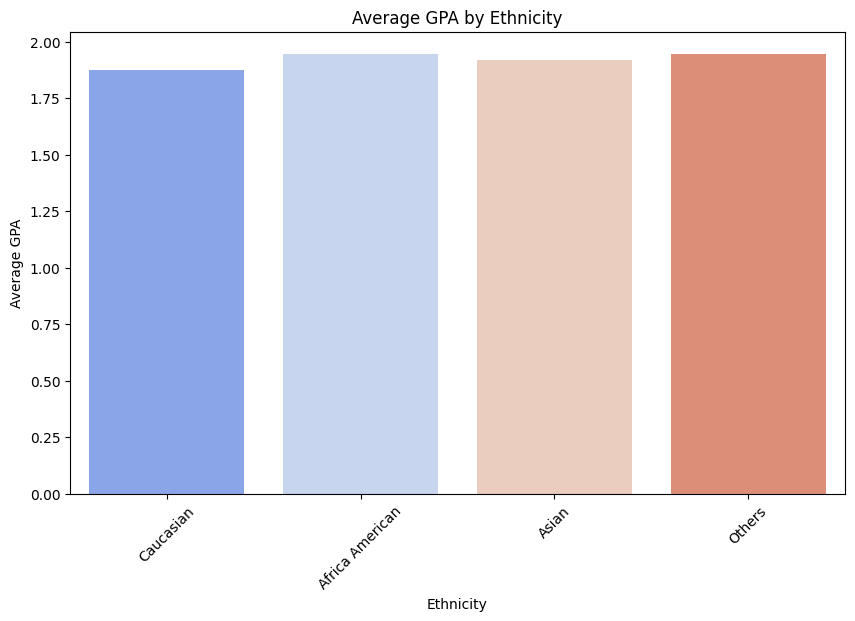

In [ ]:
# Ethnicity별 평균 GPA 비교 (막대 그래프)
ethnicity_gpa_mean = perfor.groupby("Ethnicity")["GPA"].mean().sort_values()

ethnicity_labels = {0: "Caucasian", 1: "Africa American", 2: "Asian", 3: "Others"}

plt.figure(figsize=(10, 6))
sns.barplot(x=ethnicity_gpa_mean.index, y=ethnicity_gpa_mean.values, palette="coolwarm")
plt.xlabel("Ethnicity")
plt.ylabel("Average GPA")
plt.title("Average GPA by Ethnicity")
plt.xticks(ticks=ethnicity_gpa_mean.index, labels=[ethnicity_labels[e] for e in ethnicity_gpa_mean.index], rotation=45)
plt.show()



*   아시아인의 성적이 3번째로 높을 것을 확인할 수 있다.
*   따라서 아시아인의 공부시간이 제일 낮아도 성적은 제일 낮지 않다는 것을 확인



# 가설 4: 과외를 받은 학생의 성적이 유의미하게 높을 것이다

<ipython-input-60-f43122a1e556>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=perfor["Tutoring"], y=perfor["GPA"], palette=["red", "blue"])


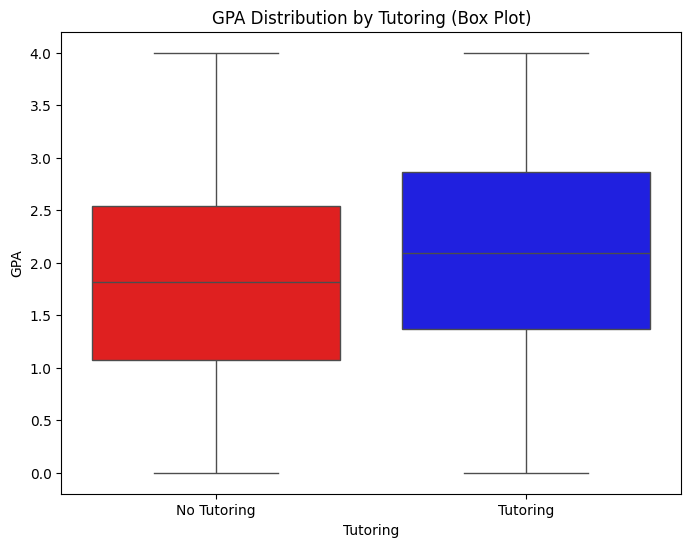

{'T-statistic': 7.172473757652107, 'P-value': 1.203032679774745e-12}


In [ ]:
# 박스플롯 (Box Plot)으로 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x=perfor["Tutoring"], y=perfor["GPA"], palette=["red", "blue"])
plt.xticks(ticks=[0, 1], labels=["No Tutoring", "Tutoring"])
plt.xlabel("Tutoring")
plt.ylabel("GPA")
plt.title("GPA Distribution by Tutoring (Box Plot)")
plt.show()

# 과외를 받은 그룹과 받지 않은 그룹의 GPA 값 추출
gpa_tutoring = perfor[perfor["Tutoring"] == 1]["GPA"]
gpa_no_tutoring = perfor[perfor["Tutoring"] == 0]["GPA"]

# 독립표본 T-test 수행
t_stat, p_value = stats.ttest_ind(gpa_tutoring, gpa_no_tutoring, equal_var=False)

print({"T-statistic": float(t_stat),
    "P-value": float(p_value)})



*   과외를 받은 학생들의 평균 성적이 높은 것을 확인 할 수 있다. P-vlaue = 1.20e-12 < 0.05
*   따라서 과외를 받은 학생들이 받지 않은 학생들보다 유의미하게 성적이 높다는 것을 확인



# 가설 5: 과외를 받은 학생들의 공부시간이 받지 않은 학생들보다 유의미하게 높을 것이다.


<ipython-input-86-acb5f8f6f8e6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=perfor["Tutoring"], y=perfor["StudyTimeWeekly"], palette=["red", "blue"])


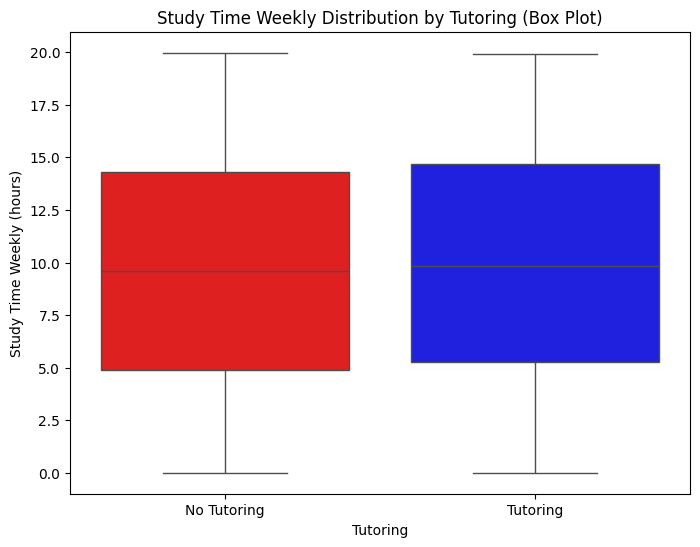

{'T 통계량': 1.417, 'P-value': 0.156647}


In [ ]:
studytime_tutoring = perfor[perfor["Tutoring"] == 1]["StudyTimeWeekly"]
studytime_no_tutoring = perfor[perfor["Tutoring"] == 0]["StudyTimeWeekly"]

t_stat, p_value = stats.ttest_ind(studytime_tutoring, studytime_no_tutoring, equal_var=False)

# 과외 여부(Tutoring)와 학습 시간(StudyTimeWeekly) 관계 - 박스플롯 (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x=perfor["Tutoring"], y=perfor["StudyTimeWeekly"], palette=["red", "blue"])
plt.xticks(ticks=[0, 1], labels=["No Tutoring", "Tutoring"])
plt.xlabel("Tutoring")
plt.ylabel("Study Time Weekly (hours)")
plt.title("Study Time Weekly Distribution by Tutoring (Box Plot)")
plt.show()

print({ "T 통계량":round(float(t_stat), 3),
       "P-value": round(float(p_value), 6)})



*   박스플롯을 확인하였을 때 유의미한 차이가 있다고 보기 어렵다. P-value=0.15 > 0.05 이므로 가설을 기각한다.



# 출석(결석)

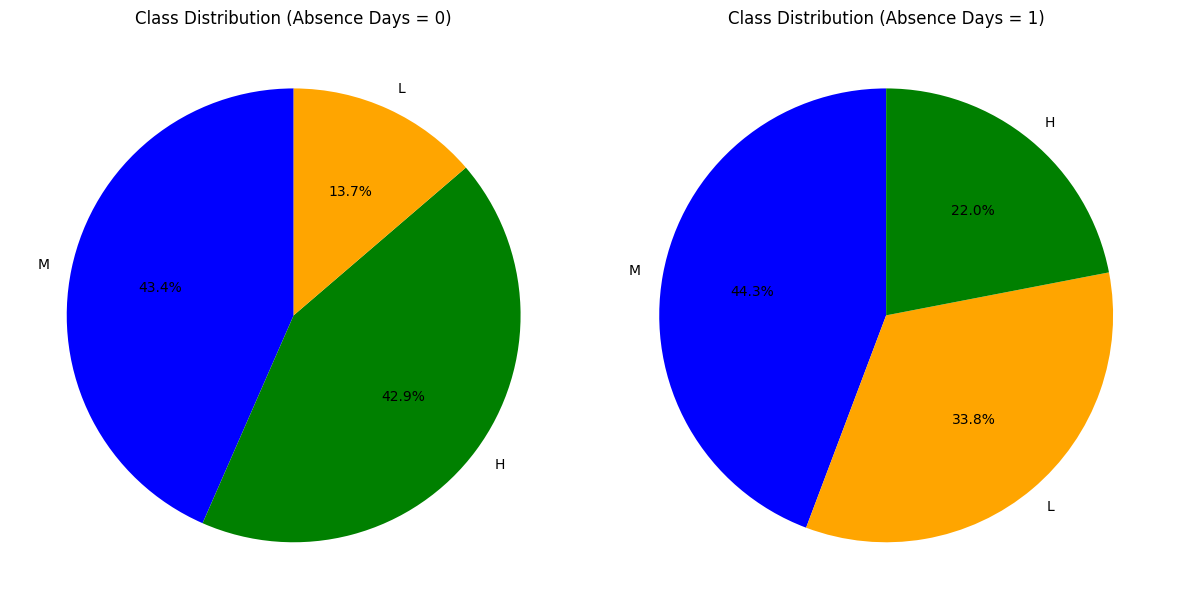

In [ ]:
# Absence Days 별 Class의 비율

# StudentAbsenceDays == 0일 때의 Class 비율
absence_0 = edu[edu["StudentAbsenceDays"] == 0]["Class"].value_counts()
# StudentAbsenceDays == 1일 때의 Class 비율
absence_1 = edu[edu["StudentAbsenceDays"] == 1]["Class"].value_counts()

# 비율로 변환
absence_0_ratio = absence_0 / absence_0.sum() * 100
absence_1_ratio = absence_1 / absence_1.sum() * 100

# 색상 고정 (L=orange, M=blue, H=green)
colors = {"L": "orange", "M": "blue", "H": "green"}

# 파이차트 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# StudentAbsenceDays == 0 파이차트
axes[0].pie(Female, labels=Female.index, autopct='%1.1f%%', startangle=90,
            colors=[colors[label] for label in Female.index])
axes[0].set_title("Class Distribution (Absence Days = 0)")

# StudentAbsenceDays == 1 파이차트
axes[1].pie(Male, labels=Male.index, autopct='%1.1f%%', startangle=90,
            colors=[colors[label] for label in Male.index])
axes[1].set_title("Class Distribution (Absence Days = 1)")


plt.tight_layout()
plt.show()

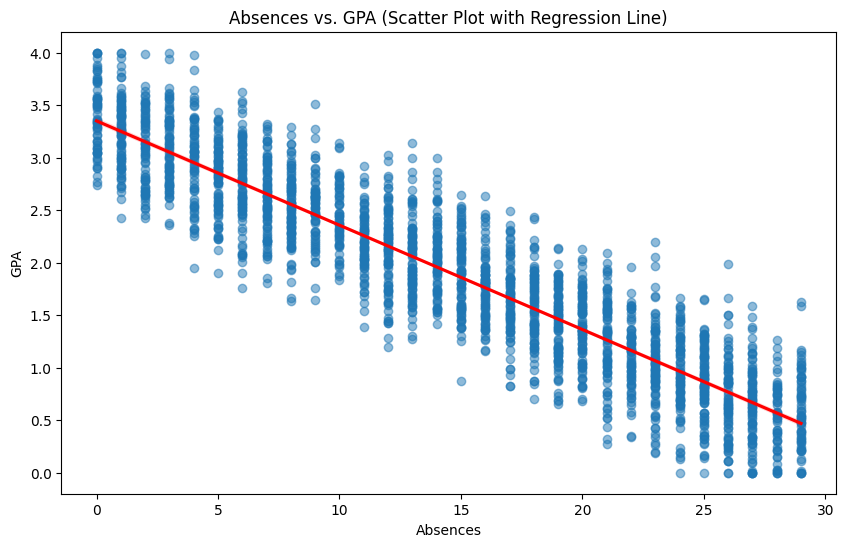

{'피어슨 상관계수': -0.9193135764208644, '상관계수 P-value': 0.0, '회귀 P-value (결석)': 0.0}


In [ ]:
# 산점도 (Scatter Plot) + 회귀선 추가
plt.figure(figsize=(10, 6))
sns.regplot(x=perfor["Absences"], y=perfor["GPA"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Absences")
plt.ylabel("GPA")
plt.title("Absences vs. GPA (Scatter Plot with Regression Line)")
plt.show()

#상관분석: 피어슨 상관계수 계산
correlation_coefficient, p_value_corr = stats.pearsonr(perfor["Absences"], perfor["GPA"])
X = sm.add_constant(perfor["Absences"])  # 절편 추가
y = perfor["GPA"]
model = sm.OLS(y, X).fit()
regression_results = model.summary()

# 통계적 검정 (p-value 확인)
p_value_regression = model.pvalues["Absences"]

# 결과 출력
print({
    "피어슨 상관계수": float(correlation_coefficient),
    "상관계수 P-value": float(p_value_corr),
    "회귀 P-value (결석)": float(p_value_regression)
})

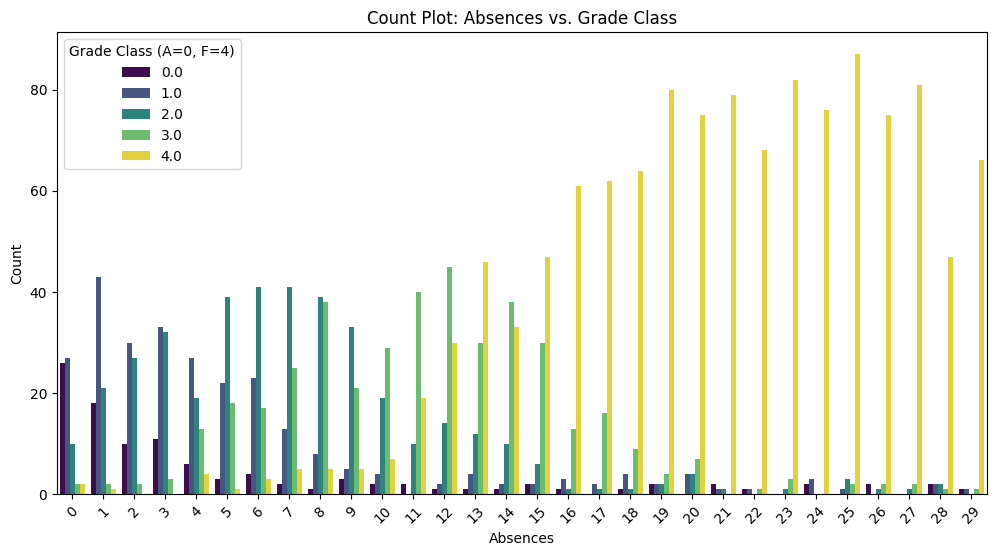

In [ ]:
# 카운트 플롯 (Count Plot) - 결석 횟수별 학점 분포
plt.figure(figsize=(12, 6))
sns.countplot(x=perfor["Absences"], hue=perfor["GradeClass"], palette="viridis")
plt.xlabel("Absences")
plt.ylabel("Count")
plt.title("Count Plot: Absences vs. Grade Class")
plt.xticks(rotation=45)
plt.legend(title="Grade Class (A=0, F=4)")
plt.show()

<ipython-input-21-f4d7e44dbb32>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=Grade["Grade_numeric"], y=Grade["Attendance (%)"], palette = colors)


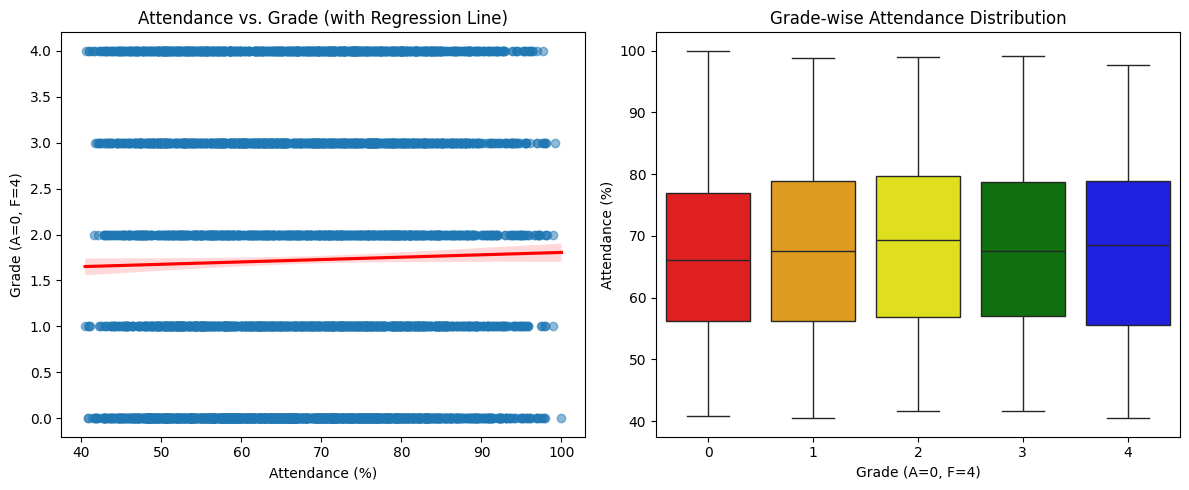

<ipython-input-21-f4d7e44dbb32>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Grade.groupby(pd.cut(Grade["Attendance (%)"], bins=[0,50,75,100]))["Grade_numeric"].mean()


,Grade_numeric
Attendance (%),
"(0, 50]",1.766304
"(50, 75]",1.677833
"(75, 100]",1.781973


In [ ]:
# 그래프 크기 설정
plt.figure(figsize=(12, 5))

colors = ["red","orange","yellow","green","blue"]

# 산점도 (Scatter Plot) + 회귀선 추가
plt.subplot(1, 2, 1)
sns.regplot(x=Grade["Attendance (%)"], y=Grade["Grade_numeric"], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel("Attendance (%)")
plt.ylabel("Grade (A=0, F=4)")
plt.title("Attendance vs. Grade (with Regression Line)")

# 박스플롯 (Box Plot)
plt.subplot(1, 2, 2)
sns.boxplot(x=Grade["Grade_numeric"], y=Grade["Attendance (%)"], palette = colors)
plt.xlabel("Grade (A=0, F=4)")
plt.ylabel("Attendance (%)")
plt.title("Grade-wise Attendance Distribution")

# 그래프 출력
plt.tight_layout()
plt.show()
Grade.groupby(pd.cut(Grade["Attendance (%)"], bins=[0,50,75,100]))["Grade_numeric"].mean()

# 가설 6:결석이 많을 수록 학습 시간이 적을 것이다

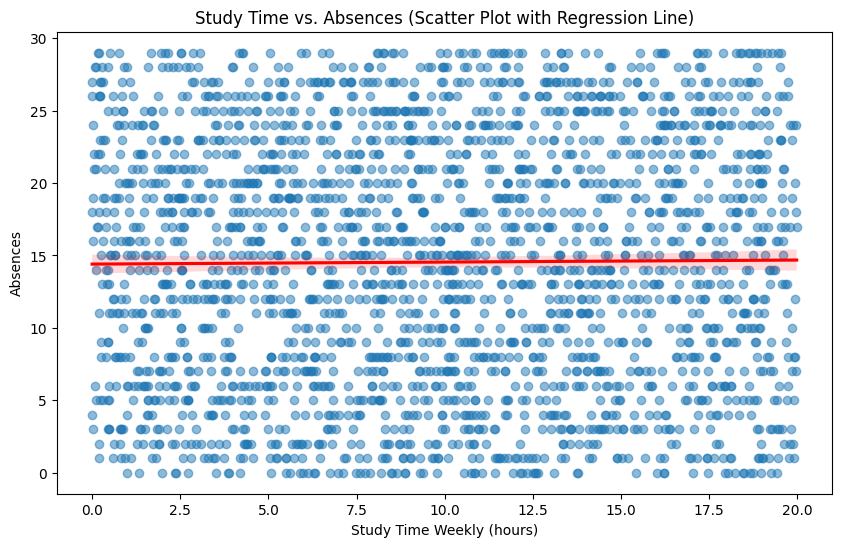

{'T 통계량': -0.04783177207916663, 'P-value': 0.9618544041732797}


In [ ]:
# 결석(Absences)의 중앙값 계산
median_absences = perfor["Absences"].median()

# 결석이 적은 그룹 (Low Absences)과 많은 그룹 (High Absences) 나누기
low_absences = perfor[perfor["Absences"] <= median_absences]["StudyTimeWeekly"]
high_absences = perfor[perfor["Absences"] > median_absences]["StudyTimeWeekly"]

# 독립표본 T-검정 (T-test) 수행
t_stat, p_value = stats.ttest_ind(low_absences, high_absences, equal_var=False)


# 학습 시간(StudyTimeWeekly)과 결석(Absences)의 관계 - 산점도 + 회귀선 추가
plt.figure(figsize=(10, 6))
sns.regplot(x=perfor["StudyTimeWeekly"], y=perfor["Absences"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.xlabel("Study Time Weekly (hours)")
plt.ylabel("Absences")
plt.title("Study Time vs. Absences (Scatter Plot with Regression Line)")
plt.show()

print({"T 통계량":float(t_stat),
       "P-value":float(p_value)})



*   산점도와 회귀선을 보니 결석과 공부시간간의 유의미한 관계가 있다고 보기 어렵다.
*   P-value=0.96 > 0.05 이므로 가설을 기각한다.





# 발표횟수

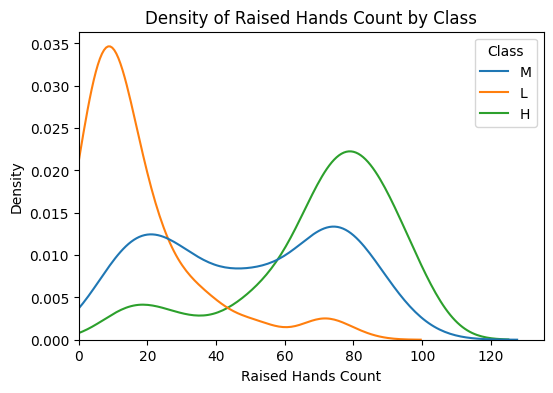

In [ ]:
# raisehands에 따른 Class의 밀도 시각화
plt.figure(figsize=(6, 4))
sns.kdeplot(data=edu, x="raisedhands", hue="Class", common_norm=False)
plt.title("Density of Raised Hands Count by Class")
plt.xlabel("Raised Hands Count")
plt.ylabel("Density")
plt.xlim(0,None)
plt.show()

# 온라인 자료 방문 횟수

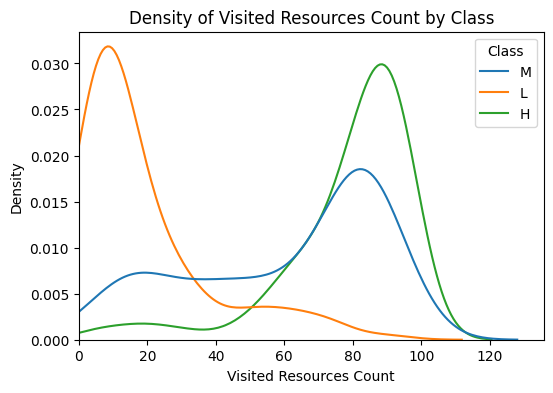

In [ ]:
# visited resources count에 따른 Class의 밀도 시각화
plt.figure(figsize=(6, 4))
sns.kdeplot(data=edu, x="VisITedResources", hue="Class", common_norm=False)
plt.title("Density of Visited Resources Count by Class")
plt.xlabel("Visited Resources Count")
plt.ylabel("Density")
plt.xlim(0,None)
plt.show()

# 토론 참여 횟수

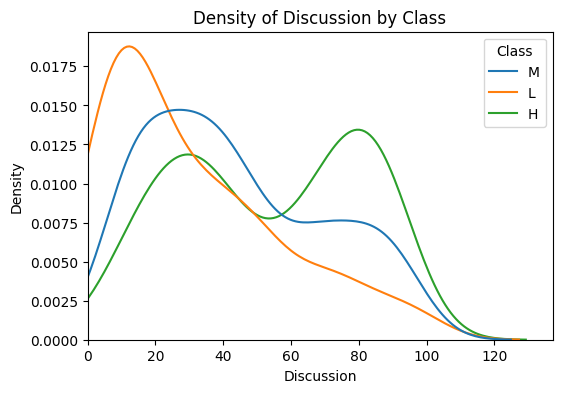

In [ ]:
# Discussion에 따른 Class의 밀도 시각화
plt.figure(figsize=(6, 4))
sns.kdeplot(data=edu, x="Discussion", hue="Class", common_norm=False)
plt.title("Density of Discussion by Class")
plt.xlabel("Discussion")
plt.ylabel("Density")
plt.xlim(0,None)
plt.show()

# 공지사항 확인 횟수

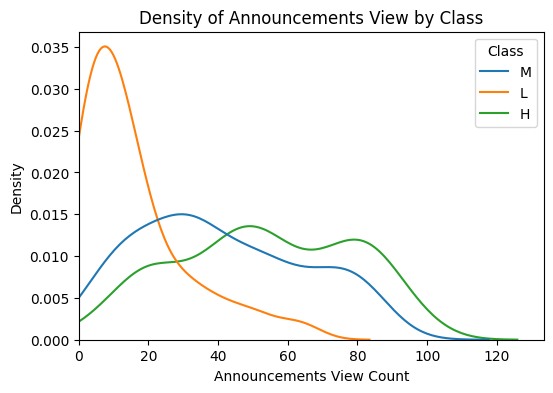

In [ ]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=edu, x="AnnouncementsView", hue="Class", common_norm=False)
plt.title("Density of Announcements View by Class")
plt.xlabel("Announcements View Count")
plt.ylabel("Density")
plt.xlim(0,None)
plt.show()


# 부모의 교육 수준 및 지원 수준

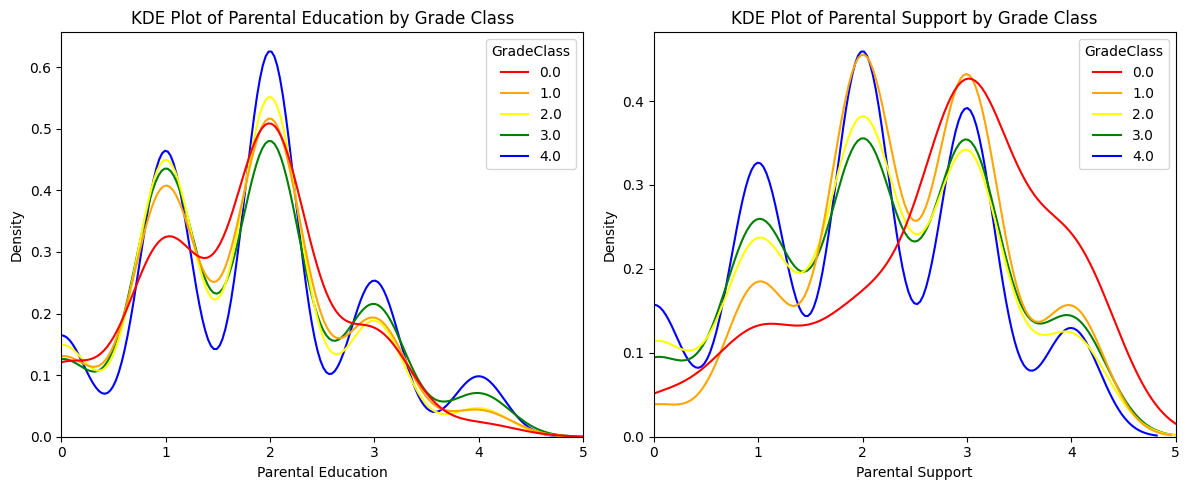

{'T-statistic': 7.172473757652107, 'P-value': 1.203032679774745e-12}


In [ ]:
color = ["red", "orange", "yellow", "green", "blue"]


# 그래프 크기 설정
plt.figure(figsize=(12, 5))

# Parental Education KDE Plot by Grade Class
plt.subplot(1, 2, 1)
sns.kdeplot(data=perfor, x="ParentalEducation", hue="GradeClass", common_norm=False, fill=False, palette = color)
plt.xlabel("Parental Education")
plt.ylabel("Density")
plt.xlim(0,5)
plt.title("KDE Plot of Parental Education by Grade Class")

# Parental Support KDE Plot by Grade Class
plt.subplot(1, 2, 2)
sns.kdeplot(data=perfor, x="ParentalSupport", hue="GradeClass", common_norm=False, fill=False, palette = color)
plt.xlabel("Parental Support")
plt.ylabel("Density")
plt.xlim(0,5)
plt.title("KDE Plot of Parental Support by Grade Class")

# 그래프 표시
plt.tight_layout()
plt.show()


# 소득

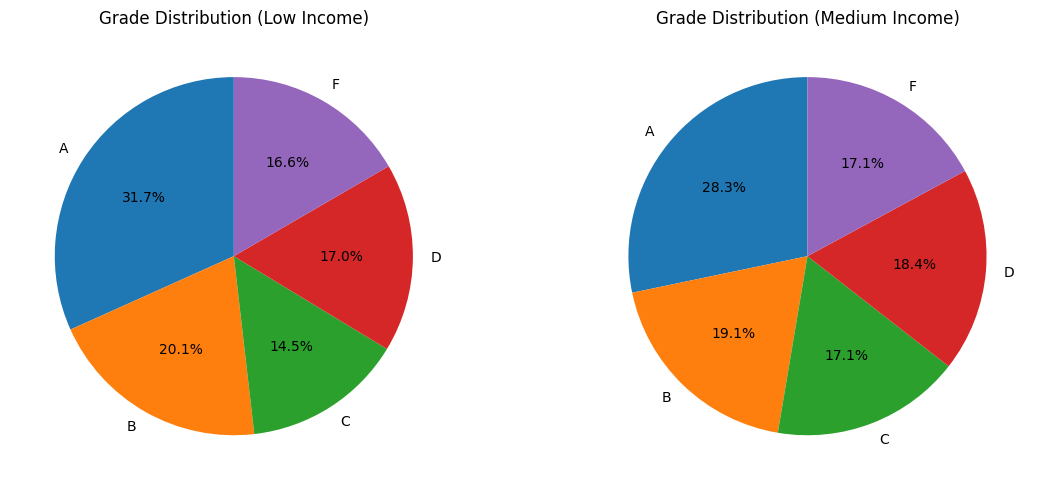

In [ ]:
grade_index = [0, 1, 2, 3, 4]  # A=0, B=1, C=2, D=3, F=4
Income_Low = Grade[Grade["Family_Income_Level"]=='Low']["Grade_numeric"].value_counts().reindex(grade_index, fill_value=0)
Income_High = Grade[Grade["Family_Income_Level"]=='High']["Grade_numeric"].value_counts().reindex(grade_index, fill_value=0)

# 라벨 정의 (A=0, B=1, C=2, D=3, F=4)
grade_labels = ["A", "B", "C", "D", "F"]

# Income 분포 파이 차트
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.pie(Income_Low, labels=grade_labels, autopct='%1.1f%%', startangle=90)
plt.title("Grade Distribution (Low Income)")

plt.subplot(1,2,2)
plt.pie(Income_High, labels=grade_labels, autopct='%1.1f%%', startangle=90)
plt.title("Grade Distribution (Medium Income)")


# 그래프
plt.tight_layout()
plt.show()

# 수면시간

Text(0.5, 1.0, 'Density of Sleep Hours per Night by Grade')

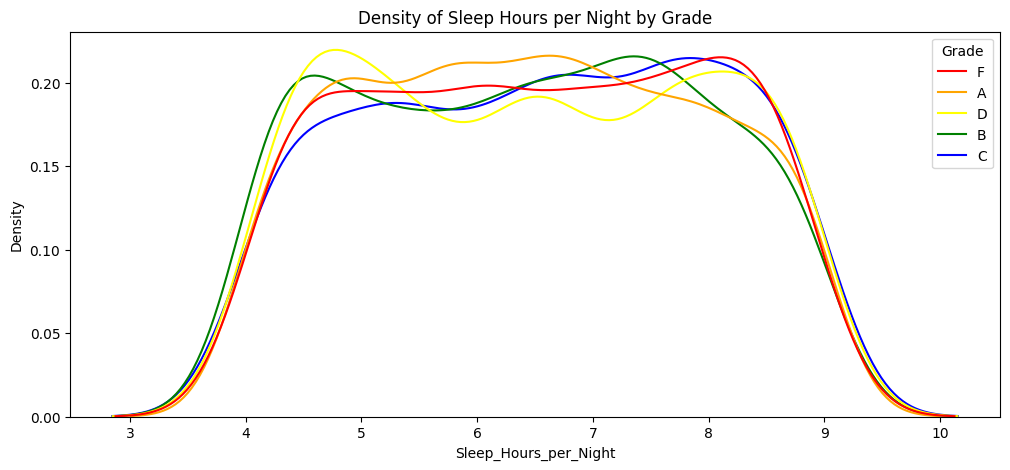

In [ ]:
color_Grade = ["red","orange","yellow","green","blue"]

plt.figure(figsize =(12,5))

plt.subplot(1,1,1)
sns.kdeplot(data=Grade, x="Sleep_Hours_per_Night", hue="Grade", common_norm=False, fill=False, palette = color_Grade)
plt.xlabel=("Sleep_Hours_per_Night")
plt.ylabel("Density")
plt.title("Density of Sleep Hours per Night by Grade")

# 국가

<ipython-input-103-75fc35210420>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=Grade["Country"], y=Grade["Grade"], order=Grade["Country"].value_counts().index, palette = color_Grade)


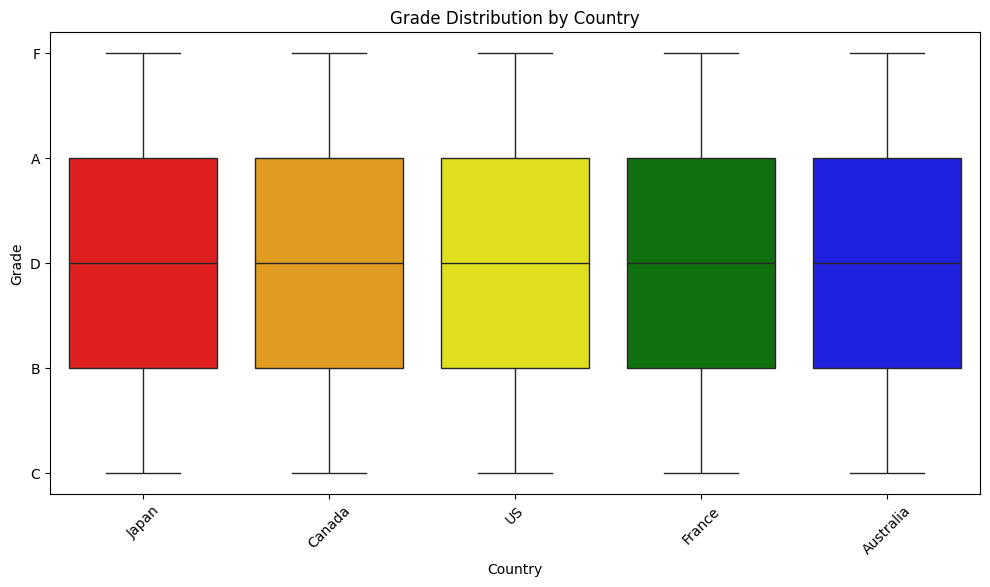

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=Grade["Country"], y=Grade["Grade"], order=Grade["Country"].value_counts().index, palette = color_Grade)

plt.xlabel("Country")
plt.ylabel("Grade")
plt.title("Grade Distribution by Country")
plt.xticks(rotation=45)
plt.show()


In [ ]:


plt = reload(plt)  # 모듈 리로드
